In [3]:
#!pip install numpy
#!pip install pandas
#!pip install prophet
import pandas as pd
from prophet import Prophet


In [4]:
d = pd.read_csv('seattle-weather.csv')

In [98]:
d.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [168]:
d1 = pd.DataFrame(d, columns=['date','wind'])

In [169]:
d1.head()

,date,wind
0,2012-01-01,4.7
1,2012-01-02,4.5
2,2012-01-03,2.3
3,2012-01-04,4.7
4,2012-01-05,6.1


In [170]:
d1.tail()

,date,wind
1456,2015-12-27,2.9
1457,2015-12-28,1.3
1458,2015-12-29,2.6
1459,2015-12-30,3.4
1460,2015-12-31,3.5


In [171]:
d1.columns = ['ds','y']

In [172]:
d1.head()

,ds,y
0,2012-01-01,4.7
1,2012-01-02,4.5
2,2012-01-03,2.3
3,2012-01-04,4.7
4,2012-01-05,6.1


In [173]:
model = Prophet()

In [174]:
d1.columns

Index(['ds', 'y'], dtype='object')

In [175]:
d1.head()

,ds,y
0,2012-01-01,4.7
1,2012-01-02,4.5
2,2012-01-03,2.3
3,2012-01-04,4.7
4,2012-01-05,6.1


In [176]:
model.fit(d1)

01:12:33 - cmdstanpy - INFO - Chain [1] start processing
01:12:33 - cmdstanpy - INFO - Chain [1] done processing


In [177]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [178]:
future_dates_prec = model.make_future_dataframe(periods=100, freq='d')

In [179]:
prediction = model.predict(future_dates_prec)

In [180]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,3.534826,1.652546,5.174158,3.534826,3.534826,-0.089354,-0.089354,-0.089354,0.048311,0.048311,0.048311,-0.137666,-0.137666,-0.137666,0.0,0.0,0.0,3.445472
1,2012-01-02,3.534000,1.545475,5.142222,3.534000,3.534000,-0.164676,-0.164676,-0.164676,-0.018976,-0.018976,-0.018976,-0.145700,-0.145700,-0.145700,0.0,0.0,0.0,3.369324
2,2012-01-03,3.533173,1.644377,5.155710,3.533173,3.533173,-0.113689,-0.113689,-0.113689,0.037176,0.037176,0.037176,-0.150865,-0.150865,-0.150865,0.0,0.0,0.0,3.419484
3,2012-01-04,3.532346,1.540261,5.071905,3.532346,3.532346,-0.235448,-0.235448,-0.235448,-0.081797,-0.081797,-0.081797,-0.153651,-0.153651,-0.153651,0.0,0.0,0.0,3.296898
4,2012-01-05,3.531519,1.603157,5.104456,3.531519,3.531519,-0.287898,-0.287898,-0.287898,-0.133311,-0.133311,-0.133311,-0.154587,-0.154587,-0.154587,0.0,0.0,0.0,3.243620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,2016-04-05,3.341454,1.824381,5.322768,3.336660,3.346303,0.288916,0.288916,0.288916,0.037176,0.037176,0.037176,0.251740,0.251740,0.251740,0.0,0.0,0.0,3.630369
1557,2016-04-06,3.341789,1.703572,5.176406,3.336875,3.346776,0.162775,0.162775,0.162775,-0.081797,-0.081797,-0.081797,0.244572,0.244572,0.244572,0.0,0.0,0.0,3.504563
1558,2016-04-07,3.342124,1.641960,5.200933,3.337138,3.347190,0.104725,0.104725,0.104725,-0.133311,-0.133311,-0.133311,0.238036,0.238036,0.238036,0.0,0.0,0.0,3.446849
1559,2016-04-08,3.342459,1.771469,5.162933,3.337427,3.347580,0.211146,0.211146,0.211146,-0.021433,-0.021433,-0.021433,0.232578,0.232578,0.232578,0.0,0.0,0.0,3.553604


In [181]:
prediction.loc[1461:1461+100].shape

(100, 19)

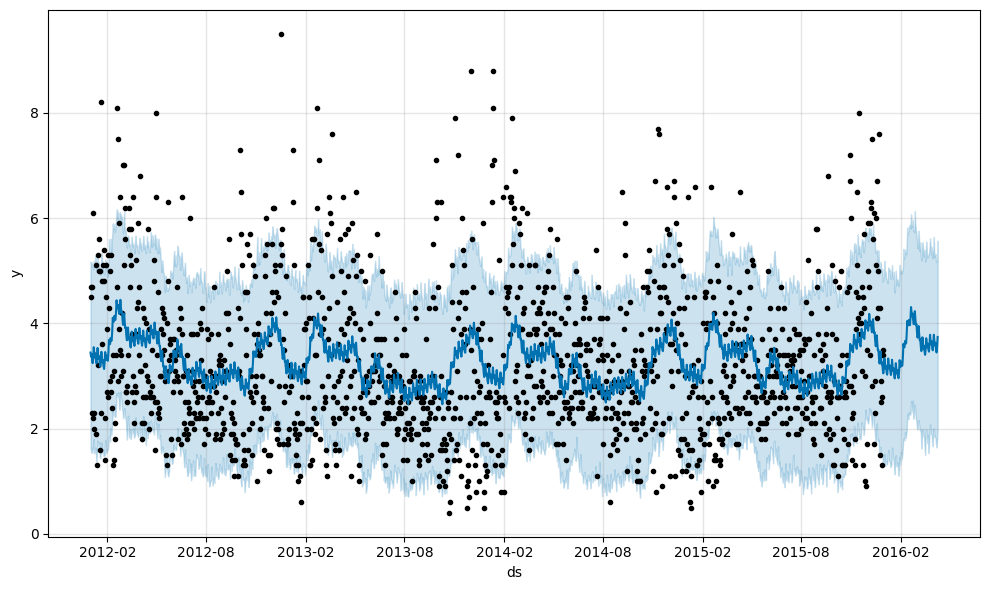

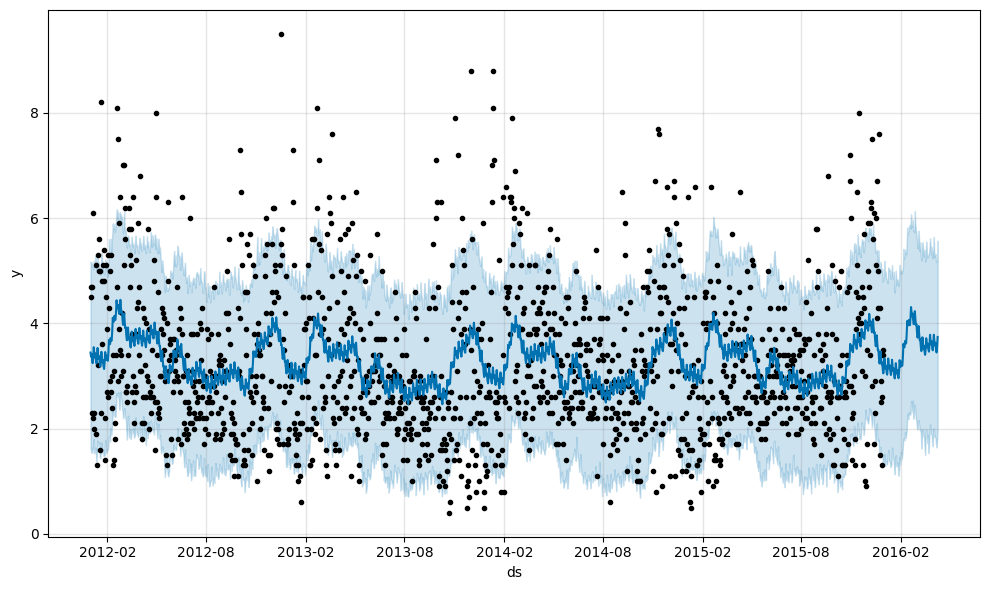

In [182]:
model.plot(prediction)

In [183]:
from prophet.serialize import model_to_json, model_from_json

with open('model_wind.json', 'w') as fout:
    fout.write(model_to_json(model))

In [184]:
type(future_dates_prec.loc[1460:])

pandas.core.frame.DataFrame